# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# [1]. Reading Data

## [1.1] Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it is easier to query the data and visualise the data efficiently.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score is above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# [5] Assignment 5: Apply Logistic Regression

<ol>
    <li><strong>Apply Logistic Regression on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Pertubation Test</strong>
        <ul>
    <li>Get the weights W after fit your model with the data X i.e Train data.</li>
    <li>Add a noise to the X (X' = X + e) and get the new data set X' (if X is a sparse
matrix, X.data+=e)</li>
    <li>Fit the model again on data X' and get the weights W'</li>
    <li>Add a small eps value(to eliminate the divisible by zero error) to W and W’ i.e
W=W+10^-6 and W’ = W’+10^-6</li>
    <li>Now find the % change between W and W' (| (W-W') / (W) |)*100)</li>
    <li>Calculate the 0th, 10th, 20th, 30th, ...100th percentiles, and observe any sudden rise in the values of percentage_change_vector</li>
    <li> Ex: consider your 99th percentile is 1.3 and your 100th percentiles are 34.6, there is sudden rise from 1.3 to 34.6, now calculate the 99.1, 99.2, 99.3,..., 100th percentile values and get the proper value after which there is sudden rise the values, assume it is 2.5</li>
            <li> Print the feature names whose % change is more than a threshold x(in our example it's 2.5)</li>
        </ul>
    </li>
    <br>
    <li><strong>Sparsity</strong>
        <ul>
    <li>Calculate sparsity on weight vector obtained after using L1 regularization</li>
        </ul>
    </li>
    <br><font color='red'>NOTE: Do sparsity and multicollinearity for any one of the vectorizers. Bow or tf-idf is recommended.</font>
    <br>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Get top 10 important features for both positive and negative classes separately.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

#### Reading the csv file (Which is already saved on my system (saved while doing naive bayes assignment))


In [2]:
review_dataset_filtered = pd.read_csv('filtered_reviews_data.csv')

In [3]:
review_dataset_filtered.shape

(364173, 12)

In [4]:
#removing all the null value represnted rows (removing rows even if one column has na in entire 12 columns in given dataset)
review_dataset_filtered.dropna(inplace=True)

In [5]:
review_dataset_filtered.shape

(364158, 12)

In [6]:
### As it is temporal data, I will be performing time-based splitting

In [7]:
#sorting the dataset according to time as we need time-based splitting
review_dataset_final_sorted = review_dataset_filtered.sort_values(by ='Time',axis=0,ascending=True,inplace=False,kind='quicksort')

In [8]:
review_dataset_final_sorted.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text
117926,150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
117903,150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
298794,451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
169283,230284,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
298793,451854,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


In [9]:
labels = review_dataset_final_sorted['Score']

In [10]:
LABELS = labels.value_counts()

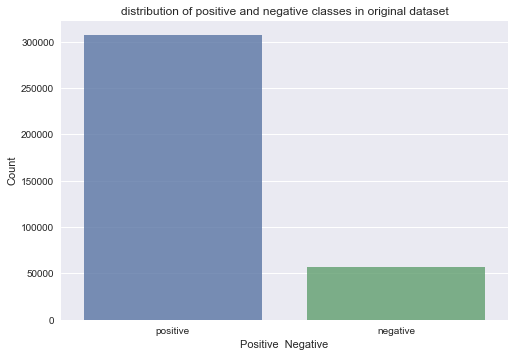

In [11]:
sns.barplot(LABELS.index,LABELS.values,alpha=0.8)
plt.title("distribution of positive and negative classes in original dataset")
plt.xlabel("Positive  Negative")
plt.ylabel("Count")
plt.show()

In [12]:
print(f"POSITIVE class labels in original data is {round(((labels.value_counts()[0]/review_dataset_final_sorted.shape[0])*100),2)} %")
print(f"NEGATIVE class labels in original data is {round(((labels.value_counts()[1]/review_dataset_final_sorted.shape[0])*100),2)} %")

POSITIVE class labels in original data is 84.32 %
NEGATIVE class labels in original data is 15.68 %


In [13]:
#Now, let's take only 100k datapoints for computation because 300K+ would not be ideal to choose among
review_dataset_final_sorted_sample = review_dataset_final_sorted.sample(n=100000)

In [14]:
#Now, let's make a check distribution of data or percentage of data present
sample_labels = review_dataset_final_sorted_sample['Score'] 

In [15]:
sample_labels.value_counts()

positive    84215
negative    15785
Name: Score, dtype: int64

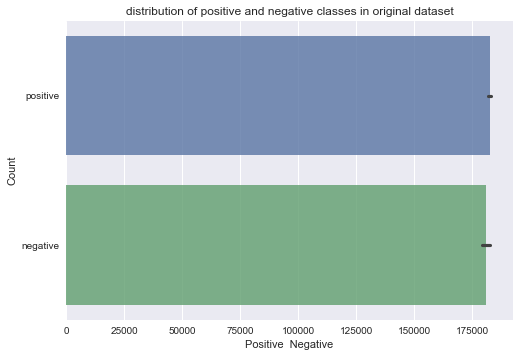

In [16]:
sns.barplot(sample_labels.index,sample_labels.values,alpha=0.8)
plt.title("distribution of positive and negative classes in original dataset")
plt.xlabel("Positive  Negative")
plt.ylabel("Count")
plt.show()

In [17]:
print(f"POSITIVE class labels in sample data is {round(((sample_labels.value_counts()[0]/review_dataset_final_sorted_sample.shape[0])*100),2)} %")
print(f"NEGATIVE class labels in sample data is {round(((sample_labels.value_counts()[1]/review_dataset_final_sorted_sample.shape[0])*100),2)} %")

POSITIVE class labels in sample data is 84.21 %
NEGATIVE class labels in sample data is 15.78 %


So, it is almost same as our original dataset. Now, we can proceed on with further operations

#### Actually it is reviews dataset. So,I think it is better if we perform time-based splitting rather than random split
So, we will sort it first and then divide the data in 80:20 ratio and from train we can divide cross validation data

In [18]:
#sorting the dataset according to time as we need time-based splitting
final_data = review_dataset_final_sorted_sample.sort_values(by ='Time',axis=0,ascending=True,inplace=False,kind='quicksort')

In [19]:
final_data.shape

(100000, 12)

So, 80000 will be train data and 20000 will be test data

In [20]:
train_data = final_data['Cleaned_text'][:80000]
test_data = final_data['Cleaned_text'][80000:]
train_data_labels = final_data['Score'][:80000]
test_data_labels = final_data['Score'][80000:]

In [21]:
#TRAIN DATA
print(f"positive labels distribution for TRAIN data {round((train_data_labels.value_counts()[0]/train_data_labels.shape[0])*100,2)}")
print(f"negative labels distribution for TRAIN data {round((train_data_labels.value_counts()[1]/train_data_labels.shape[0])*100,2)}")

positive labels distribution for TRAIN data 84.5
negative labels distribution for TRAIN data 15.5


In [22]:
#TEST DATA
print(f"positive labels distribution for TEST data {round((test_data_labels.value_counts()[0]/test_data_labels.shape[0])*100,2)}")
print(f"negative labels distribution for TEST data {round((test_data_labels.value_counts()[1]/test_data_labels.shape[0])*100,2)}")

positive labels distribution for TEST data 83.06
negative labels distribution for TEST data 16.94


So, as we can see that there is slight variation in both distributions but it is fine to some extent

# Applying Logistic Regression

In [39]:
#importing all the necessary packages needed for Logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

## [5.1] Logistic Regression on BOW,<font color='red'> SET 1</font>

### [5.1.1] Applying Logistic Regression with L1 regularization on BOW,<font color='red'> SET 1</font>

#### 1. Initially applying BOW on train data and then will apply BOW on test data

In [40]:
#BoW on train data
count_vect = CountVectorizer() #in scikit-learn
bow_train_data = count_vect.fit_transform(train_data)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
print("the type of count vectorizer ",type(bow_train_data))
print("the shape of out text BOW vectorizer ",bow_train_data.get_shape())
print("the number of unique words ", bow_train_data.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaaaa', 'aaaaaaaaaaaaaaaaaaaargh', 'aaaaah', 'aaaah', 'aaaand', 'aaaarrrrghh', 'aaah', 'aachen']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (80000, 34040)
the number of unique words  34040


In [41]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#using GridSearchCV
model = GridSearchCV(LogisticRegression(penalty='l1'),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(bow_train_data,train_data_labels.values)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [42]:
print(model.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [43]:
#https://stackoverflow.com/questions/38692520/what-is-the-difference-between-fit-transform-and-transform-in-sklearn-countvecto
bow_test_data = count_vect.transform(test_data)

In [50]:
print(f"Train accuracy is {round(model.score(bow_train_data, train_data_labels.values)*100,2)}%")

Train accuracy is 97.18%


In [51]:
print(f"Test accuracy is {round(model.score(bow_test_data, test_data_labels.values)*100,2)}%")

Test accuracy is 93.18%


#### [5.1.1.1] Calculating sparsity on weight vector obtained using L1 regularization on BOW,<font color='red'> SET 1</font>

In [52]:
# Please write all the code with proper documentation
l1_model = LogisticRegression(C=1.0,penalty='l1')
l1_model.fit(bow_train_data,train_data_labels.values)
weight_vec = l1_model.coef_
print(np.count_nonzero(weight_vec))

4578


#### Confusion matrix and AUC Scores

In [53]:
predictions = l1_model.predict(bow_test_data)
prediction_probability_test = l1_model.predict_proba(bow_test_data)
prediction_probability_train = l1_model.predict_proba(bow_train_data)

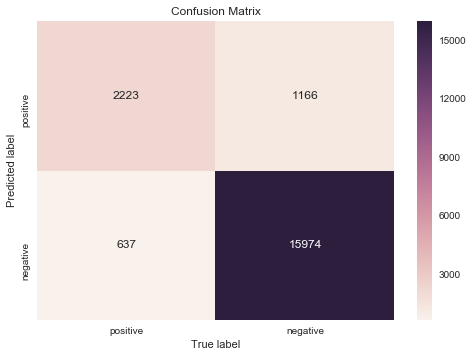

In [54]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.9318569699988875


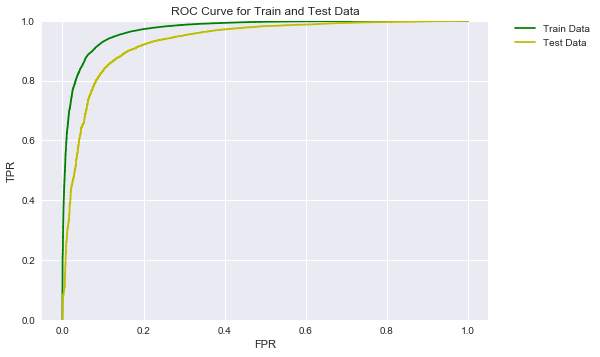

In [80]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
#AUC and ROC Values

fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### [5.1.2] Applying Logistic Regression with L2 regularization on BOW,<font color='red'> SET 1</font>

In [101]:
# Please write all the code with proper documentation
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#using GridSearchCV
model = GridSearchCV(LogisticRegression(penalty='l2'),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(bow_train_data,train_data_labels.values)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [102]:
print(model.best_estimator_)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [103]:
l2_model = LogisticRegression(C=0.01,penalty='l2')
l2_model.fit(bow_train_data,train_data_labels.values)
weight_vec = l2_model.coef_
print(np.count_nonzero(weight_vec))

34040


In [104]:
print(f"Train accuracy is {round(l2_model.score(bow_train_data,train_data_labels.values)*100,2)}%") #Test accuracy

Train accuracy is 91.11%


In [105]:
print(f"Test accuracy is {round(l2_model.score(bow_test_data, test_data_labels.values)*100,2)}%") #Test accuracy

Test accuracy is 89.73%


In [106]:
predictions = l2_model.predict(bow_test_data)
prediction_probability_test = l2_model.predict_proba(bow_test_data)
prediction_probability_train = l2_model.predict_proba(bow_train_data)

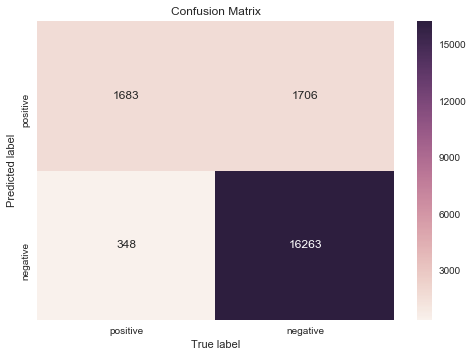

In [107]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.9329126470372093


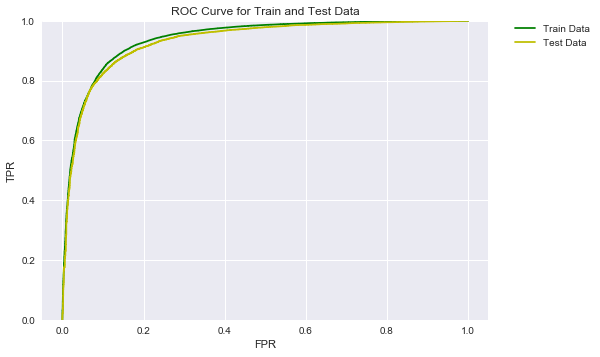

In [108]:
fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [109]:
weight_vec.shape

(1, 34040)

#### [5.1.2.1] Performing pertubation test (multicollinearity check) on BOW,<font color='red'> SET 1</font>

In [110]:
import numpy as np

In [111]:
#To understand multicollinearity , we perform pertubation test.Actual Definition: a deviation of a system, moving object, or process from its regular or normal state or path, caused by an outside influence which even seems same what we thought of
#bow_train_data is my original data , variable new_data is pertubated data , adding error value =,1

#let's consider our error value from uniform distribution b/w +0.0001 and -0.0001
error = np.random.uniform(-0.0001,0.0001,1 ) #error value which is to be added as a part of pertubation
new_data = bow_train_data.astype(float) #new_data is pertubated data (as we are adding float value.So, it is recommended to use float value over there)
new_data.data = new_data.data+error


pertubated_model = LogisticRegression(C=0.01,penalty='l2') #using the values obtained at l2 regularization
pertubated_model.fit(new_data,train_data_labels)
pertubated_weight_vec = pertubated_model.coef_


In [112]:
bow_train_data

<80000x34040 sparse matrix of type '<class 'numpy.int64'>'
	with 2522048 stored elements in Compressed Sparse Row format>

In [113]:
pertubated_weight_vec.shape

(1, 34040)

In [114]:
l2_weight_vec = weight_vec+10**-6 #adding 10**-6 to avoid divison by zero error
p_weight_vec = pertubated_weight_vec+10**-6 #adding 10**-6 to avoid divison by zero error

In [115]:
#percentage change
percentage_change = (abs((l2_weight_vec - p_weight_vec)/l2_weight_vec)*100)

In [116]:
percentage_change

array([[ 0.00186035,  0.00175517,  0.0003536 , ...,  0.00048644,
         0.00260827,  0.00329643]])

In [117]:
percentiles = [10,20,30,40,50,60,70,80,90,100]
for each_percentile in percentiles:
    print(f"{each_percentile}th percentile value is {np.percentile(percentage_change,each_percentile)}")

10th percentile value is 0.0011304274649346481
20th percentile value is 0.002304258882984027
30th percentile value is 0.0034516122733440685
40th percentile value is 0.0045656470829227355
50th percentile value is 0.005661931709816043
60th percentile value is 0.0068176285735520896
70th percentile value is 0.00807445293513242
80th percentile value is 0.009449424201676423
90th percentile value is 0.012544384508900365
100th percentile value is 22.973575983298296


mostly all of the values seem abnormal but b/w 90th and 100th percentile there is huge change. So, we will try to find b/w them 

In [118]:
percentiles = [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]
for each_percentile in percentiles:
    print(f"{each_percentile}th percentile value is {np.percentile(percentage_change,each_percentile)}")

99.1th percentile value is 0.07910010315705121
99.2th percentile value is 0.09093058087751701
99.3th percentile value is 0.10745793501490912
99.4th percentile value is 0.12276533415846307
99.5th percentile value is 0.1438691173605509
99.6th percentile value is 0.17063213460136128
99.7th percentile value is 0.22968404506856513
99.8th percentile value is 0.4164062723484683
99.9th percentile value is 0.952100064403833
100th percentile value is 22.973575983298296


99.0th percentile value is 0.06744852272295626
99.1th percentile value is 0.07910010315705121
99.2th percentile value is 0.09093058087751701
99.3th percentile value is 0.10745793501490912
99.4th percentile value is 0.12276533415846307
99.5th percentile value is 0.1438691173605509
99.6th percentile value is 0.17063213460136128
99.7th percentile value is 0.22968404506856513
99.8th percentile value is 0.4164062723484683
99.9th percentile value is 0.952100064403833
100.0th percentile value is 22.973575983298296


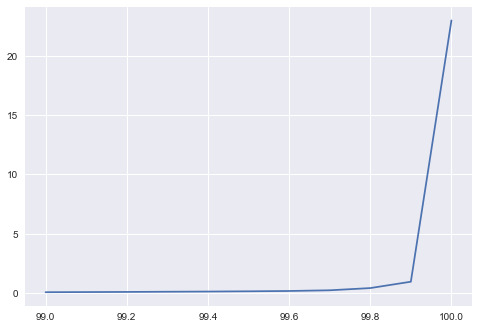

In [119]:
percentiles = np.linspace(99,100,11)
for each_percentile in percentiles:
    print(f"{each_percentile}th percentile value is {np.percentile(percentage_change,each_percentile)}")

plt.plot(percentiles,np.percentile(percentage_change,percentiles) )

So, let's consider our threshold as >0.75, will try to find the features which have similar value

In [120]:
no_of_multicollinear_features = percentage_change[np.where(percentage_change>0.69)].size
print(f"% of features which didnot change by more than 0.69 is {(l2_weight_vec.size-no_of_multicollinear_features)/l2_weight_vec.size*100}")

% of features which didnot change by more than 0.69 is 99.87074030552292


#### So, only very small percentage of features have changed. So, we can conclude that there is no multi-collinearity

In [121]:
print(f"% of features which didnot change by more than 0.69 is {(l2_weight_vec.size-no_of_multicollinear_features)/l2_weight_vec.size*100}")

% of features which didnot change by more than 0.69 is 99.87074030552292


### [5.1.3] Feature Importance on BOW,<font color='red'> SET 1</font>

#### [5.1.3.1] Top 10 important features of positive class from<font color='red'> SET 1</font>

In [122]:
imp_feat_df = pd.DataFrame(weight_vec.T,columns=['positive'])
imp_feat_df['feature'] = count_vect.get_feature_names()
top_features = imp_feat_df.sort_values(by='positive',kind='quicksort',ascending=False) # ascending=False because we want to arrange in descending order
print(f"Top 10 important features of positive reviews are : {np.array(top_features['feature'][:10])}")

Top 10 important features of positive reviews are : ['delici' 'great' 'best' 'perfect' 'excel' 'love' 'nice' 'amaz' 'thank'
 'favorit']


#### [5.1.3.2] Top 10 important features of negative class from<font color='red'> SET 1</font>

In [123]:
print(f"Top 10 important features of negative reviews are : {np.array(top_features['feature'].tail(10))}") #tail becuase we know last values will be negative when top of them are positive

Top 10 important features of negative reviews are : ['bland' 'threw' 'return' 'unfortun' 'money' 'horribl' 'terribl' 'aw'
 'worst' 'disappoint']


## [5.2] Logistic Regression on TFIDF,<font color='red'> SET 2</font>

### [5.2.1] Applying Logistic Regression with L1 regularization on TFIDF,<font color='red'> SET 2</font>

In [124]:
# Please write all the code with proper documentation
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf_train_data = tf_idf_vectorizer.fit_transform(train_data)
print("some sample features(unique words in the corpus)",tf_idf_vectorizer.get_feature_names()[0:10])
print('='*50)
print("the type of count vectorizer ",type(tf_idf_train_data))
print("the shape of out text TFIDF vectorizer ",tf_idf_train_data.get_shape())
print("the number of unique words including both unigrams and bigrams ", tf_idf_train_data.get_shape()[1])

some sample features(unique words in the corpus) ['aback', 'abandon', 'abdomin', 'abil', 'abl', 'abl add', 'abl buy', 'abl chew', 'abl drink', 'abl eat']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (80000, 48758)
the number of unique words including both unigrams and bigrams  48758


### [5.2.2] Applying Logistic Regression with L2 regularization on TFIDF,<font color='red'> SET 2</font>

In [125]:
#https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution
import timeit

In [126]:
# Please write all the code with proper documentation
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

start = timeit.default_timer() #program starting time

#using GridSearchCV
model = GridSearchCV(LogisticRegression(penalty='l2'),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(tf_idf_train_data,train_data_labels.values)

stop = timeit.default_timer()  #program end time
execution_time = stop - start  #total execution time

print(f"Program Executed in {execution_time}") #It returns time in sec

Program Executed in 54.1976971


In [127]:
print(model.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [128]:
tf_idf_test_data = tf_idf_vectorizer.transform(test_data)

In [129]:
l2_model = LogisticRegression(C=1,penalty='l2')
l2_model.fit(tf_idf_train_data,train_data_labels.values)
weight_vec = l2_model.coef_
print(np.count_nonzero(weight_vec))

48758


In [130]:
print(f"Train accuracy is {round(l2_model.score(tf_idf_train_data,train_data_labels.values)*100,2)}%") #Test accuracy

Train accuracy is 93.88%


In [131]:
print(f"Test accuracy is {round(l2_model.score(tf_idf_test_data,test_data_labels.values)*100,2)}%")

Test accuracy is 91.54%


In [132]:
predictions = l2_model.predict(tf_idf_test_data)
prediction_probability_test = l2_model.predict_proba(tf_idf_test_data)
prediction_probability_train = l2_model.predict_proba(tf_idf_train_data)

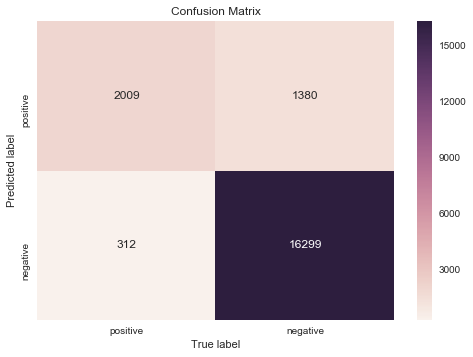

In [133]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.9561577036437138


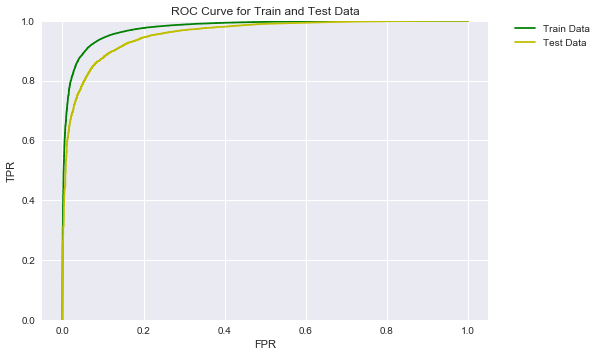

In [134]:
fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### [5.2.3] Feature Importance on TFIDF,<font color='red'> SET 2</font>

#### [5.2.3.1] Top 10 important features of positive class from<font color='red'> SET 2</font>

In [135]:
imp_feat_df = pd.DataFrame(weight_vec.T,columns=['positive'])
imp_feat_df['feature'] = tf_idf_vectorizer.get_feature_names()
top_features = imp_feat_df.sort_values(by='positive',kind='quicksort',ascending=False) # ascending=False because we want to arrange in descending order
print(f"Top 10 important features of positive reviews are : {np.array(top_features['feature'][:10])}")

Top 10 important features of positive reviews are : ['great' 'best' 'love' 'delici' 'perfect' 'excel' 'good' 'high recommend'
 'nice' 'favorit']


#### [5.2.3.2] Top 10 important features of negative class from<font color='red'> SET 2</font>

In [136]:
print(f"Top 10 important features of negative reviews are : {np.array(top_features['feature'].tail(10))}") #tail becuase we know last values will be negative when top of them are positive

Top 10 important features of negative reviews are : ['money' 'bland' 'threw' 'return' 'unfortun' 'horribl' 'terribl' 'aw'
 'worst' 'disappoint']


In [94]:
#saving features for future use
np.savez('bow_train_and_test_data.npz',bow_train_data,bow_test_data)

In [95]:
np.savez('tf_idf_train_and_test_data.npz',tf_idf_train_data,tf_idf_test_data)

## [5.3] Logistic Regression on AVG W2V,<font color='red'> SET 3</font>

### [5.3.1] Applying Logistic Regression with L1 regularization on AVG W2V<font color='red'> SET 3</font>

In [197]:
# Train your own Word2Vec model using your own text corpus with train_data
list_of_sentences_train=[]
for sentance in train_data:
    list_of_sentences_train.append(sentance.split())

In [198]:
#training W2V using test data
list_of_sentences_test=[]
for sentance in test_data:
    list_of_sentences_test.append(sentance.split())

In [199]:
# Train your own Word2Vec model using your own text corpus with train_data with min_count = 5
w2v_model=Word2Vec(list_of_sentences_train,min_count=5,size=50, workers=4)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))

number of words that occured minimum 5 times  11536


In [200]:
#computing avgW2V for train data (for each review)
train_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentences_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)


100%|███████████████████████████████████████████████████████████████████████████| 80000/80000 [04:19<00:00, 307.76it/s]


In [201]:
#computing avgW2V for train data (for each review)
test_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentences_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec)


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:49<00:00, 400.73it/s]


In [103]:
#np.savez('avgW2V_train_and_test.npz',train_vectors,test_vectors)

In [158]:
#avgW2V = np.load('avgW2V_train_and_test.npz')

In [159]:
#avgW2V.files

['arr_0', 'arr_1']

In [160]:
#train_vectors = avgW2V['arr_0']

In [161]:
#test_vectors = avgW2V['arr_1']

In [202]:
# Data-preprocessing: Standardizing the data , We can even proceed without standardizing but if we standardize our data then whole values will be in same range.So, we are doing it
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
train_vector_standardized =standardization.fit_transform(train_vectors)
test_vector_standardized = standardization.transform(test_vectors)

In [203]:
# Please write all the code with proper documentation
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#using GridSearchCV
model = GridSearchCV(LogisticRegression(penalty='l1'),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(train_vector_standardized,train_data_labels.values)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [204]:
print(model.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [205]:
l1_model = LogisticRegression(C=1,penalty='l1')
l1_model.fit(train_vector_standardized,train_data_labels.values)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [206]:
print(f"Train accuracy is {round(l1_model.score(train_vector_standardized,train_data_labels.values)*100,2)}%")
print(f"Test accuracy is {round(l1_model.score(test_vector_standardized,test_data_labels.values)*100,2)}%")

Train accuracy is 89.21%
Test accuracy is 88.34%


In [207]:
predictions = l1_model.predict(test_vector_standardized)
prediction_probability_test = l1_model.predict_proba(test_vector_standardized)
prediction_probability_train = l1_model.predict_proba(train_vector_standardized)

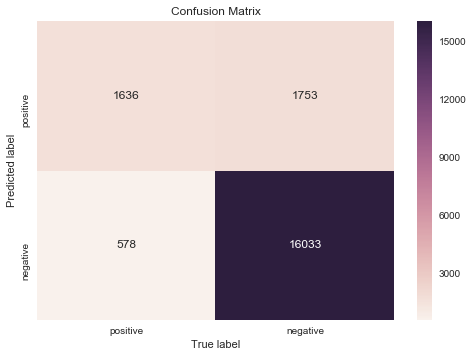

In [208]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.9077587954627114


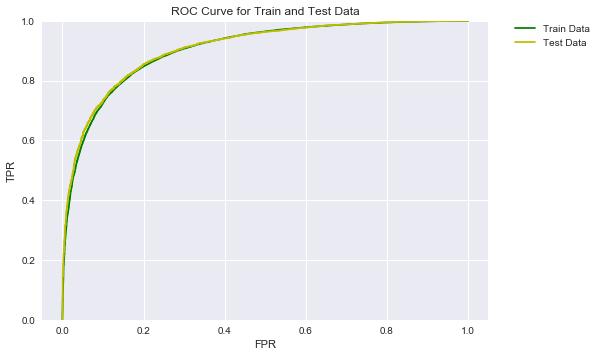

In [209]:
fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### [5.3.2] Applying Logistic Regression with L2 regularization on AVG W2V,<font color='red'> SET 3</font>

In [210]:
# Please write all the code with proper documentation
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#using GridSearchCV
model = GridSearchCV(LogisticRegression(penalty='l2'),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(train_vector_standardized,train_data_labels.values)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [211]:
print(model.best_estimator_)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [212]:
l2_model = LogisticRegression(C=0.01,penalty='l2')
l2_model.fit(train_vector_standardized,train_data_labels.values)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [213]:
print(f"Train accuracy is {round(l2_model.score(train_vector_standardized,train_data_labels.values)*100,2)}%")
print(f"Test accuracy is {round(l2_model.score(test_vector_standardized,test_data_labels.values)*100,2)}%")

Train accuracy is 89.17%
Test accuracy is 88.33%


In [214]:
predictions = l2_model.predict(test_vector_standardized)
prediction_probability_test = l2_model.predict_proba(test_vector_standardized)
prediction_probability_train = l2_model.predict_proba(train_vector_standardized)

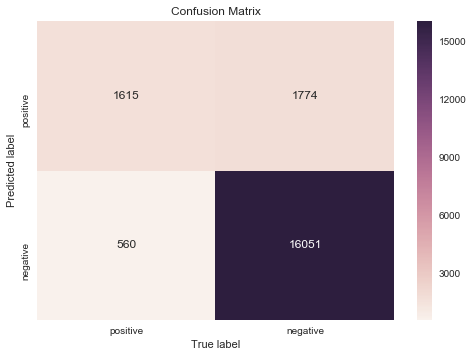

In [215]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.9076082839019297


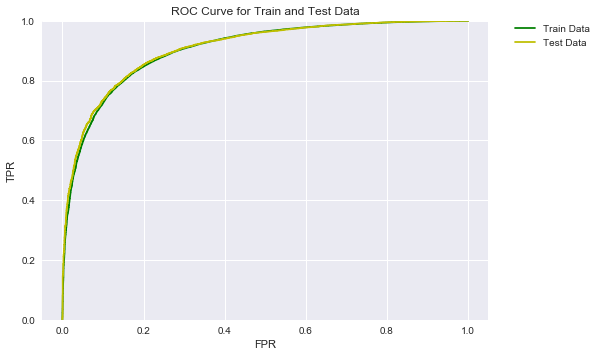

In [216]:
fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## [5.4] Logistic Regression on TFIDF W2V,<font color='red'> SET 4</font>

### [5.4.1] Applying Logistic Regression with L1 regularization on TFIDF W2V,<font color='red'> SET 4</font>

In [217]:
# Please write all the code with proper documentation
#I am using tfidf_train and test which is already done in previous steps and also using Only Word2Vec from previous one
dictionary = dict(zip(tf_idf_vectorizer.get_feature_names(), list(tf_idf_vectorizer.idf_)))
tfidf_features = tf_idf_vectorizer.get_feature_names()
tfidf_sent_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentences_train): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_features:
            vec = w2v_model.wv[word]
            #  tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_train.append(sent_vec)
    row += 1

100%|██████████████████████████████████████████████████████████████████████████| 80000/80000 [2:32:40<00:00,  8.73it/s]


In [218]:
#test-data (for test data)
dictionary = dict(zip(tf_idf_vectorizer.get_feature_names(), list(tf_idf_vectorizer.idf_)))
tfidf_features = tf_idf_vectorizer.get_feature_names()
tfidf_sent_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentences_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_features:
            vec = w2v_model.wv[word]
            #  tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_test.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [32:12<00:00, 10.35it/s]


In [118]:
#np.savez('tf_idf_W2V_train_and_test.npz',tfidf_sent_train,tfidf_sent_test)

In [177]:
#tfidfW2V = np.load('tf_idf_W2V_train_and_test.npz')

In [178]:
#tfidf_sent_train = tfidfW2V['arr_0']

In [179]:
#tfidf_sent_test = tfidfW2V['arr_1']

In [219]:
# Data-preprocessing: Standardizing the data , We can even proceed without standardizing but if we standardize our data then whole values will be in same range.So, we are doing it
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
tfidf_sent_train_standardized =standardization.fit_transform(tfidf_sent_train)
tfidf_sent_test_standardized = standardization.transform(tfidf_sent_test)

In [220]:
# Please write all the code with proper documentation
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#using GridSearchCV
model = GridSearchCV(LogisticRegression(penalty='l1'),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(tfidf_sent_train_standardized,train_data_labels.values)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [221]:
print(model.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [222]:
l1_model = LogisticRegression(C=1,penalty='l1')
l1_model.fit(tfidf_sent_train_standardized,train_data_labels.values)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [223]:
print(f"Train accuracy is {round(l1_model.score(tfidf_sent_train_standardized,train_data_labels.values)*100,2)}%")
print(f"Test accuracy is {round(l1_model.score(tfidf_sent_test_standardized,test_data_labels.values)*100,2)}%")

Train accuracy is 87.86%
Test accuracy is 87.2%


In [224]:
predictions = l1_model.predict(tfidf_sent_test_standardized)
prediction_probability_test = l1_model.predict_proba(tfidf_sent_test_standardized)
prediction_probability_train = l1_model.predict_proba(tfidf_sent_train_standardized)

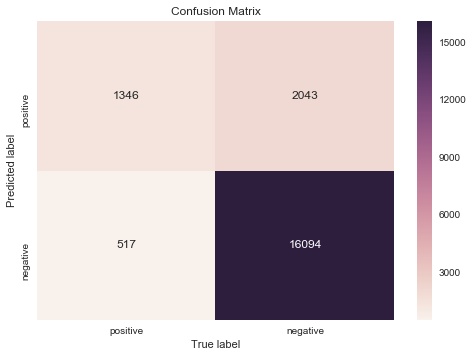

In [225]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.879929646636763


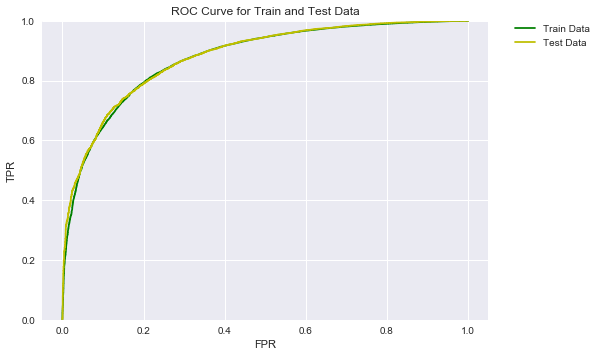

In [226]:
fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### [5.4.2] Applying Logistic Regression with L2 regularization on TFIDF W2V,<font color='red'> SET 4</font>

In [227]:
# Please write all the code with proper documentation
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#using GridSearchCV
model = GridSearchCV(LogisticRegression(penalty='l2'),tuned_parameters,scoring='roc_auc',cv=3)
model.fit(tfidf_sent_train_standardized,train_data_labels.values)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [228]:
print(model.best_estimator_)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [229]:
l2_model = LogisticRegression(C=0.01,penalty='l2')
l2_model.fit(tfidf_sent_train_standardized,train_data_labels.values)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [230]:
print(f"Train accuracy is {round(l2_model.score(tfidf_sent_train_standardized,train_data_labels.values)*100,2)}%")
print(f"Test accuracy is {round(l2_model.score(tfidf_sent_test_standardized,test_data_labels.values)*100,2)}%")

Train accuracy is 87.79%
Test accuracy is 87.14%


In [231]:
predictions = l2_model.predict(tfidf_sent_test_standardized)
prediction_probability_test = l2_model.predict_proba(tfidf_sent_test_standardized)
prediction_probability_train = l2_model.predict_proba(tfidf_sent_train_standardized)

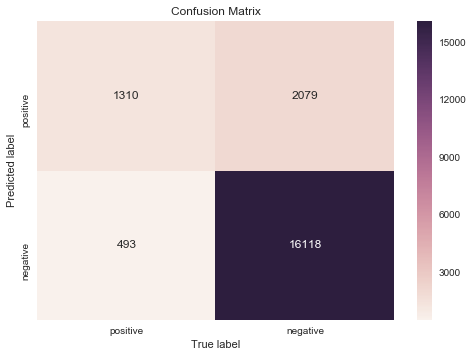

In [232]:
# Code for drawing seaborn heatmaps
class_names = ['positive','negative']
heatmap_dataframe = pd.DataFrame(confusion_matrix(test_data_labels.values, predictions), index=class_names, columns=class_names )
heatmap = sns.heatmap(heatmap_dataframe, annot=True, fmt="d")

# Setting tick labels for heatmap
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

The AUC value for test data is 0.8799096802736899


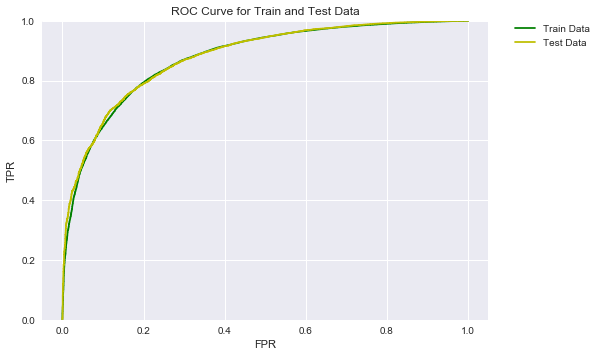

In [233]:
fpr_train, tpr_train, threshold_train = roc_curve(train_data_labels, prediction_probability_train [:,1],pos_label='positive')
fpr_test, tpr_test, threshold_test = roc_curve(test_data_labels, prediction_probability_test[:,1],pos_label='positive')
print(f"The AUC value for test data is {roc_auc_score(test_data_labels, prediction_probability_test[:,1])}")

plt.plot(fpr_train, tpr_train,'g', label = 'Train Data')
plt.plot(fpr_test, tpr_test,'y', label = 'Test Data')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.title("ROC Curve for Train and Test Data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# [6] Conclusions


1. Among all the NLP techniques, we have obtained good accuracy with tf-idf model

2. In order to test for multi-collinearity , we have tested using pertubation test. We don't have multi-collinearity (as we have seen that 99.8% hasn
't changed after pertubation)

3. Important features for positive reviews are , i.e., when it has these words then they are predicted as POSITIVE review{'delici' 'great' 'best' 'excel' 'perfect' 'love' 'nice' 'amaz' 'favorit'
 'wonder'}
Similarly, When it has negative reviews , important features which obtained are {'stale' 'wast' 'money' 'unfortun' 'horribl' 'return' 'aw' 'terribl'
 'worst' 'disappoint'}

4. We have also seen that we have got sparsity for L1 more than L2 ( By L1 regularization, you essentially make the vector x smaller (sparse), as most of its components are useless (zeros), and at the same time, the remaining non-zero components are very “useful”.) https://medium.com/mlreview/l1-norm-regularization-and-sparsity-explained-for-dummies-5b0e4be3938a

There is table below which has all the detailed model evaluations.. 

-----> Even though we haven't tested using cross-validation dataset, By observing test and train accuracies we can co-relate whether our model is good or is it tending to overfit/underfit.

-----> Here, in only B.O.W, we can see such phenomena where our there is slight more difference between train and test accuracy. But, typically it also might not be case of overfitting as our test accuracy is somewhat on higher side.

-----> Among all, we have got high roc-auc on Tf-idf model. So, we would say, it is best among others.

In [234]:
from prettytable import PrettyTable
# reference : http://zetcode.com/python/prettytable/
pretty_table = PrettyTable()
pretty_table.field_names = ["vectorizer_type","model-Penalty","Hyperparameter(C)","roc-auc","train_accuracy","test_accuracy"]
pretty_table.add_row(["Bag of words","L1","0.01","0.93","97.18%","93.18%"])
pretty_table.add_row(["Bag of words","L2","1","0.93","91.1%","89.7%"])
pretty_table.add_row(["TF-IDF","L2","1","0.956","93.4%","91.2%"])
pretty_table.add_row(["AvgW2V","L1","1","0.907","89.21%","88.34%"])
pretty_table.add_row(["AvgW2V","L2","1","0.907","89.17%","88.3%"])
pretty_table.add_row(["Tf_idfW2V","L1","1","0.879","87.86%","87.2%"])
pretty_table.add_row(["Tf_idfW2V","L2","0.01","0.879","87.79%","87.14%"])
print(pretty_table)

+-----------------+---------------+-------------------+---------+----------------+---------------+
| vectorizer_type | model-Penalty | Hyperparameter(C) | roc-auc | train_accuracy | test_accuracy |
+-----------------+---------------+-------------------+---------+----------------+---------------+
|   Bag of words  |       L1      |        0.01       |   0.93  |     97.18%     |     93.18%    |
|   Bag of words  |       L2      |         1         |   0.93  |     91.1%      |     89.7%     |
|      TF-IDF     |       L2      |         1         |  0.956  |     93.4%      |     91.2%     |
|      AvgW2V     |       L1      |         1         |  0.907  |     89.21%     |     88.34%    |
|      AvgW2V     |       L2      |         1         |  0.907  |     89.17%     |     88.3%     |
|    Tf_idfW2V    |       L1      |         1         |  0.879  |     87.86%     |     87.2%     |
|    Tf_idfW2V    |       L2      |        0.01       |  0.879  |     87.79%     |     87.14%    |
+---------